In [8]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# To import files from another folder
import sys
sys.path.append('../')
import filehandler as fh
import datahandler as dh
import datastruct as ds

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

In [4]:
df = fh.loadDataH5('../data/struct_freq_only/', 'freq_every_20th_file.h5')
df

,MG2TE201/Meas1/PRIM,MG4TE517/Meas1/PRIM,MG2PT401/Meas1/PRIM,MG2TE272/Meas1/PRIM,MG4TE705/Meas1/PRIM,SP058/Meas1/PRIM,EG005/Meas1/PRIM,IBS009/Meas1/PRIM,SW012/OutRunning/PRIM,MG1PT201/Meas1/PRIM,...,CA004/Meas1/PRIM,MG2TE703/Meas1/PRIM,MI210/Meas1/PRIM,EG009/Meas1/PRIM,RG020/Meas1/PRIM,MP2068/Meas1/PRIM,RD118/Meas1/PRIM,LC007/Meas1/PRIM,MG3TE101/Meas1/PRIM,GC_S1_COMP_N2/Meas1/PRIM
10th,0.076923,0.000046,0.111111,0.083333,0.000046,0.100000,0.499750,0.000046,0.001667,0.000484,...,0.003731,0.090909,0.099083,0.000047,0.200040,0.004348,0.062496,0.500000,0.200000,0.001047
25th,0.200000,0.000046,0.250000,0.200000,0.000046,0.166694,0.990099,0.000064,0.001667,0.000536,...,0.011765,0.250000,0.497760,0.000061,0.333333,0.008696,0.125016,0.999001,0.333333,0.001948
50th,0.500000,0.000046,0.498753,0.500000,0.000046,0.333333,0.999001,0.000109,0.001667,0.001757,...,0.040000,0.500000,0.999001,0.000129,0.500000,0.015151,0.250063,1.000000,0.500000,0.003155
75th,1.000000,0.000046,0.500250,1.000000,0.000046,0.500250,1.001001,0.000370,0.001667,0.065128,...,0.250063,1.000000,1.000000,0.004068,1.000000,0.028572,0.500000,1.000000,1.000000,0.003185
90th,1.000000,0.000046,1.000000,1.000000,0.000046,1.000000,1.002004,0.024415,0.001667,0.200000,...,1.000000,1.000000,1.001001,0.010223,1.000000,0.052643,1.000000,1.001001,1.000000,0.003236
Mean,0.540679,0.000046,0.482008,0.555661,0.000046,0.433469,0.871604,0.004856,0.002018,0.066342,...,0.230596,0.609109,0.732927,0.003705,0.616135,0.028280,0.389252,0.910849,0.647512,0.003016


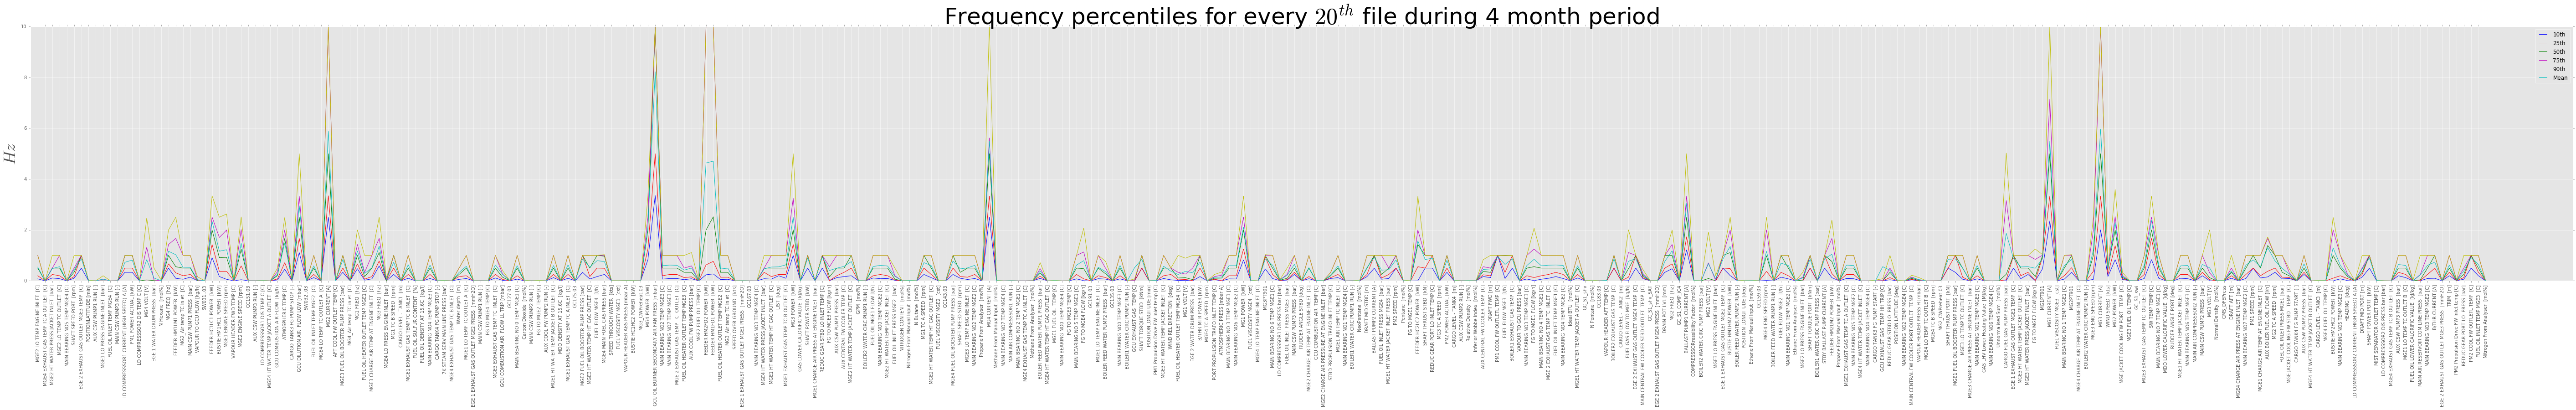

In [9]:
color = ['b', 'r', 'g', 'm', 'y', 'c']

fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(111)
x = np.arange(338)+1

for i,index in enumerate(df.index):
    ax.plot(x, df.loc[index], color=color[i], label=index)

ax.set_xticks(x)
ax.set_xticklabels([ds.tagno2name(tag) for tag in df.columns], rotation='vertical')
ax.set_title('Frequency percentiles for every $20^{th}$ file during 4 month period', fontsize = 50)
ax.set_ylabel('$Hz$', fontsize = 36)
ax.legend()

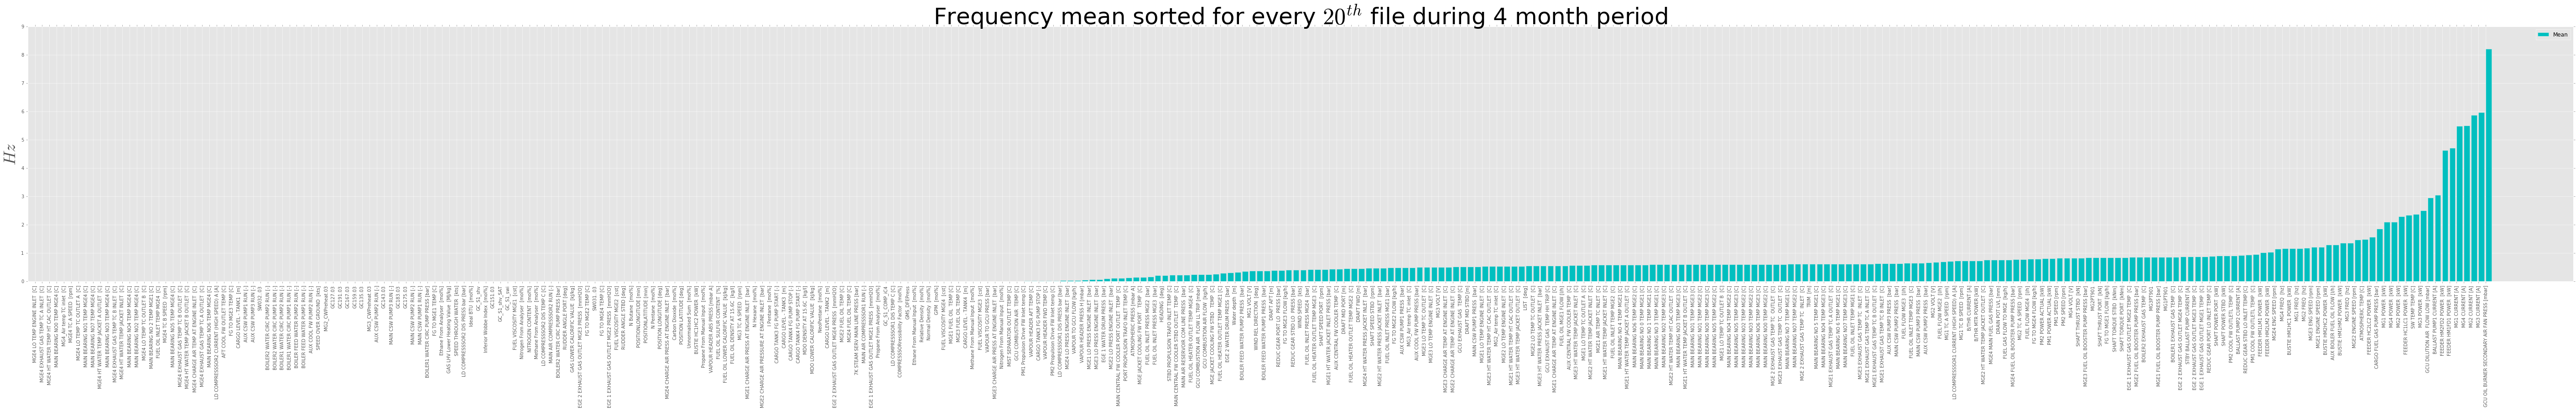

In [26]:
fig2 = plt.figure(figsize=(100,10))
ax2 = fig2.add_subplot(111)

df_sorted_mean = df.T.sort_values('Mean', ascending=True).T
ax2.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

ax2.set_xticks(x)
ax2.set_xticklabels([ds.tagno2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax2.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period', fontsize = 50)
ax2.set_ylabel('$Hz$', fontsize = 36)
ax2.legend()

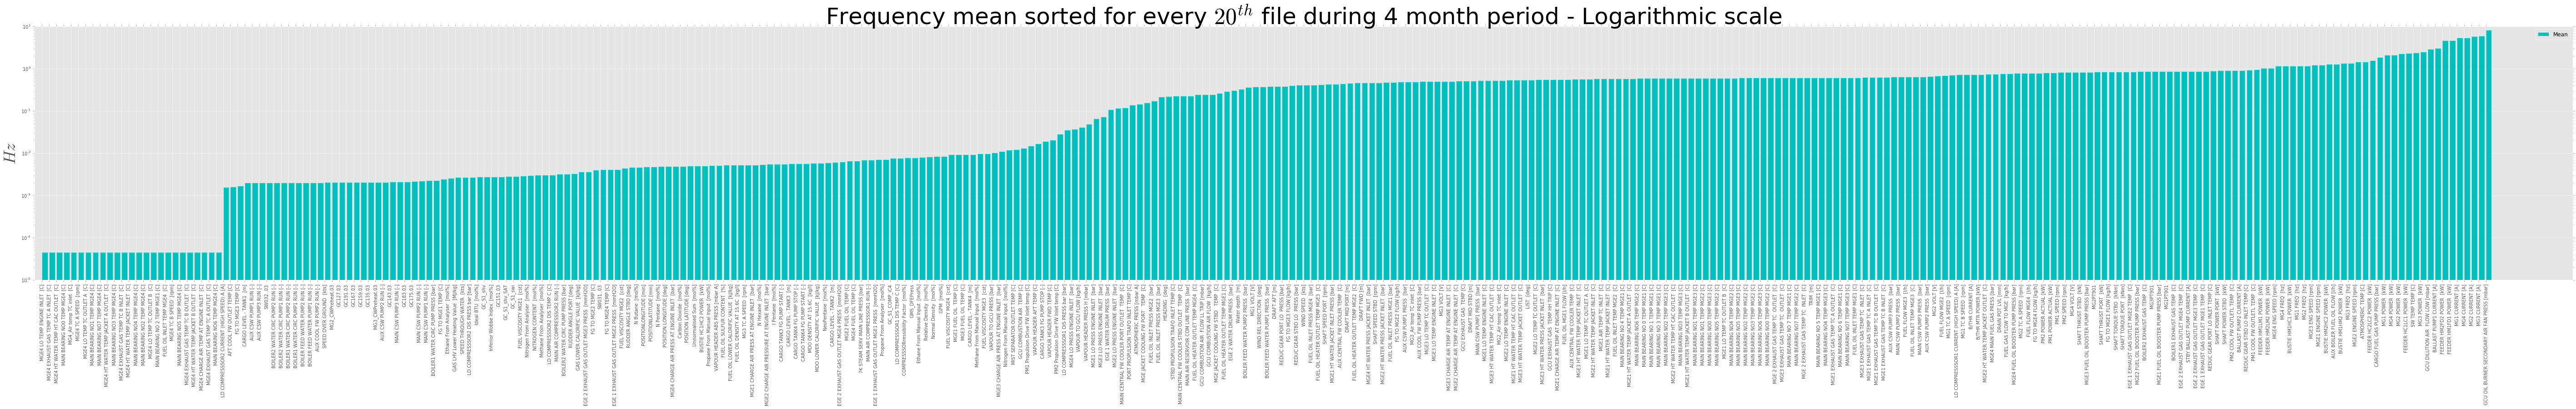

In [27]:
fig3 = plt.figure(figsize=(100,10))
ax3 = fig3.add_subplot(111)

ax3.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

ax3.set_yscale('log')
ax3.set_xticks(x)
ax3.set_xticklabels([ds.tagno2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax3.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Logarithmic scale', fontsize = 50)
ax3.set_ylabel('$Hz$', fontsize = 36)
ax3.legend()

In [28]:
#df_sorted_mean = df.T.sort_values('Mean', ascending=True).T
df_sorted_mean_grouped = df_sorted_mean.T.groupby(df_sorted_mean.loc['Mean']<0.001)
df_sorted_mean_grouped

# fig4 = plt.figure(figsize=(100,10))
# ax4 = fig4.add_subplot(111)

# ax4.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

# ax4.set_yscale('log')
# ax4.set_xticks(x)
# ax4.set_xticklabels([ds.tagno2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
# ax4.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Logarithmic scale', fontsize = 50)
# ax4.set_ylabel('$Hz$', fontsize = 36)
# ax4.legend()

In [24]:
df_sorted_mean.loc[df_sorted_mean.loc['Mean'] < 0.5]

IndexingError: Unalignable boolean Series key provided